In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv("fare_prediction_data/train.csv")

In [4]:
# Select features and target variable
X = data[['trip_distance', 'trip_time']]  # Features
y = data['fare_amount']  # Target variable

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

In [7]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [12]:
test_data = pd.read_csv("fare_prediction_data/test.csv")

In [13]:
new_X_test = test_data[["trip_distance", "trip_time"]]

In [40]:
# Make predictions
y_pred = knn.predict(new_X_test)

In [17]:
y_pred.shape, test_data.shape

((127888,), (127888, 4))

In [18]:
test_data["predicted_amount"] = y_pred

In [20]:
test_data.head(10)

,Unnamed: 0,trip_distance,trip_time,fare_amount,predicted_amount
0,511549,19.56,50.983333,52.0,51.804
1,511550,19.34,27.483333,51.5,52.100
2,511551,10.66,31.983333,35.5,33.698
3,511552,17.91,35.316667,52.0,51.300
4,511553,12.70,55.100000,45.5,44.400
5,511554,16.20,47.266667,52.0,51.200
6,511555,21.17,32.216667,52.0,55.200
7,511556,17.32,44.800000,52.0,52.000
8,511557,15.46,37.800000,43.0,46.100
9,511558,13.44,23.916667,52.0,47.200


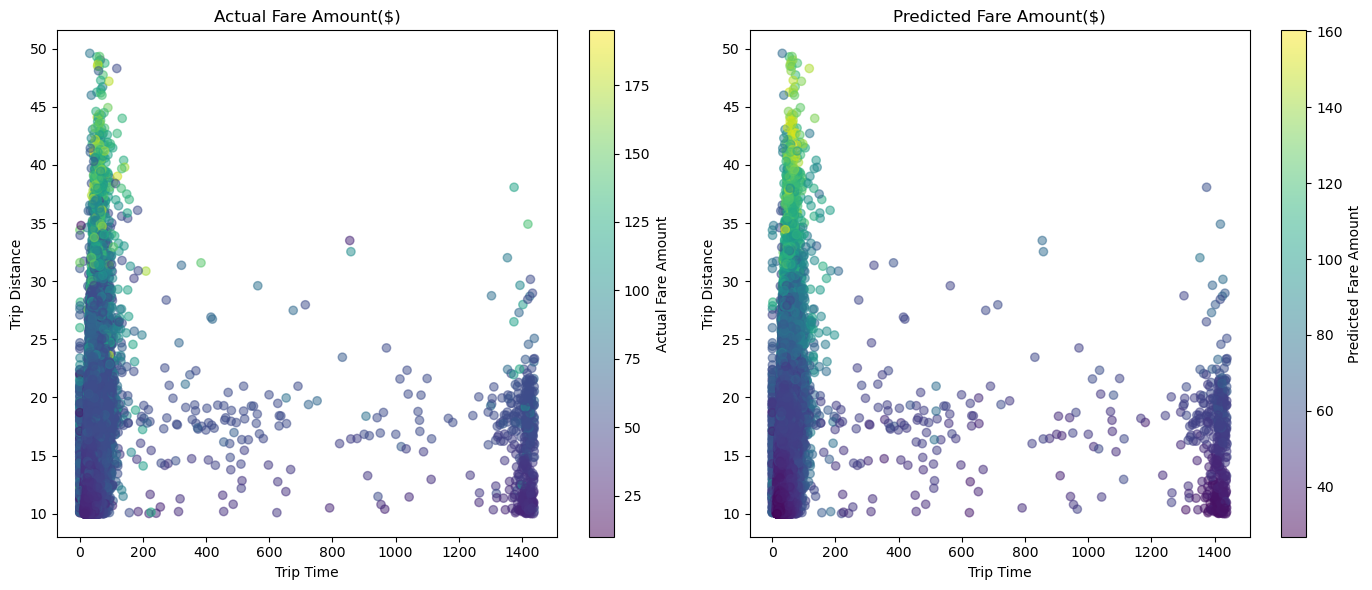

In [21]:
plt.figure(figsize=(14, 6))

# Actual fare amounts
plt.subplot(1, 2, 1)
plt.scatter(test_data['trip_time'], test_data['trip_distance'], c=test_data['fare_amount'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Actual Fare Amount')
plt.xlabel('Trip Time')
plt.ylabel('Trip Distance')
plt.title('Actual Fare Amount($)')

# Predicted fare amounts
plt.subplot(1, 2, 2)
plt.scatter(test_data['trip_time'], test_data['trip_distance'], c=test_data['predicted_amount'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Predicted Fare Amount')
plt.xlabel('Trip Time')
plt.ylabel('Trip Distance')
plt.title('Predicted Fare Amount($)')

plt.tight_layout()
plt.show()

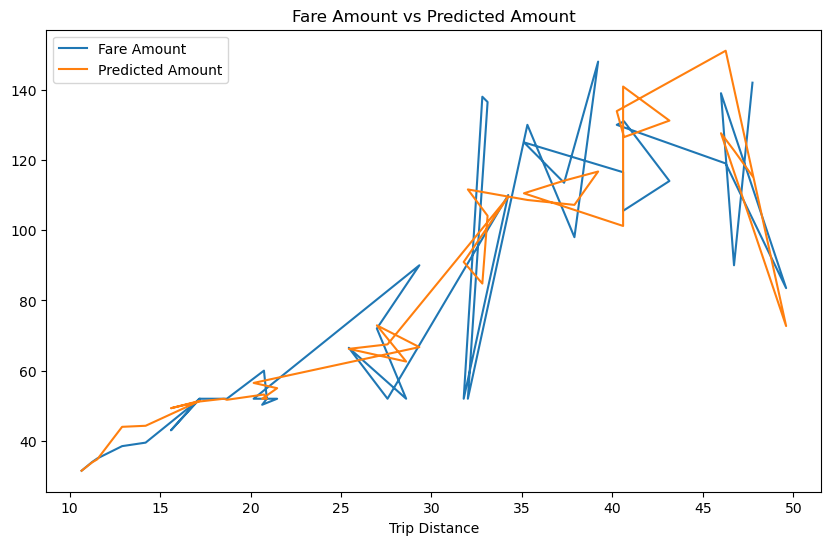

In [37]:
import numpy as np

def sample_plot(data, column, num=50):
  #  Define number of bins
  num_bins = 10
  bins = np.linspace(0, num, num_bins + 1)
  sampled_data_list = []

  # Sample evenly from each bin
  for i in range(num_bins):
      bin_data = data[(data[column] >= bins[i]) & (data[column] < bins[i+1])]
      if not bin_data.empty:
          sampled_data_list.append(bin_data.sample(min(len(bin_data), 5), random_state=42))

  sampled_data = pd.concat(sampled_data_list)

  return sampled_data

sample = sample_plot(test_data, 'trip_distance')
plt.figure(figsize=(10, 6))

plt.plot(sample['trip_distance'], sample['fare_amount'], label='Fare Amount')
plt.plot(sample['trip_distance'], sample['predicted_amount'], label='Predicted Amount')
plt.title('Fare Amount vs Predicted Amount')
plt.xlabel('Trip Distance')
plt.legend()

Performance seems nice

In [42]:
y_test = test_data["fare_amount"]
y_test.shape, y_pred.shape

((127888,), (127888,))

In [48]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)


print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
# print(f'Accuracy: {accuracy:.2f}')

Mean Squared Error: 59.31
Mean Absolute Error: 3.85
